In [0]:
import numpy as np
import random

In [0]:
def distance(p1, p2):
  """ Finds the distance between points p1 and p2. """
  return np.sqrt(np.sum(np.power(p2-p1, 2)))

In [23]:
p1 = np.array([1,1])
p2 = np.array([4,4])
distance(p1,p2)

4.242640687119285

In [0]:
def majority_votes(votes):
  """Return the most common element in votes."""

  vote_counts = {}
  for vote in votes:
    if (vote in vote_counts):
      vote_counts[vote] += 1
    else: 
      vote_counts[vote] = 1

  winners = []
  max_count = max(vote_counts.values())
  for vote, count in vote_counts.items():
    if (count == max_count):
      winners.append(vote)
  return random.choice(winners)


In [0]:
import scipy.stats as ss

def majority_votes_short(votes):
  """Return the most common element in votes."""

  mode, count = ss.mstats.mode(votes) 
  return mode

In [0]:
votes = [1,2,3,1,2,2,3,3,3,3,4,5,1,6,1,1]

In [27]:
majority_votes(votes)

3

In [0]:
def find_nearest_neighbours(p, points, k=5):
  """ Find the k nearest neighbours of point p and return their indices. "
  distances = np.zeros(points.shape[0])
  for i in range(len(distances)):
    distances[i] = distance(p, points[i])
  ind = np.argsort(distances)
  return ind[:k]

In [0]:
points= np.array([[1,1], [1,2], [1,3], [2,1], [2,2], [2,3], [3,1], [3,2], [3,3]])
p = np.array([2.5, 2])

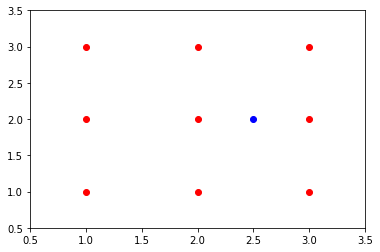

In [30]:
import matplotlib.pyplot as plt


plt.plot(points[:,0], points[:,1], "ro")
plt.plot(p[0], p[1], "bo")
plt.axis([0.5, 3.5, 0.5, 3.5])
plt.show()

In [31]:
ind = find_nearest_neighbours(p, points, 3);points[ind]

array([[2, 2],
       [3, 2],
       [2, 1]])

In [0]:
def knn_predict(p, points, outcomes, k=5):
  """ Find the k nearest neighbours and predict the class of point p. """
  ind = find_nearest_neighbours(p, points, k)
  return majority_votes(outcomes[ind])

In [0]:
outcomes= np.array([0,0,0,0,1,1,1,1,1])

In [41]:
knn_predict(p, points, outcomes, k=5)

1

In [0]:
# generating random synthetic test data and class (outcomes).
def generate_synth_data(n=50):
  """Create two sets of point for bivariate normal distributions."""
  points = np.concatenate((ss.norm(0,1).rvs((n,2)), ss.norm(1,1).rvs((n,2))))
  outcomes = np.concatenate((np.repeat(0,n), np.repeat(1,n)))
  return (points, outcomes)

In [0]:
n=20
points, outcomes = generate_synth_data(n)

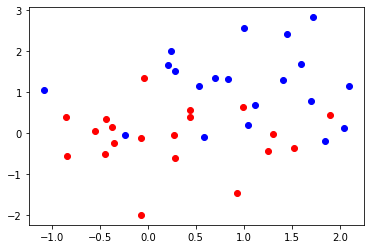

In [54]:
plt.plot(points[:n,0], points[:n,1], "ro");
plt.plot(points[n:,0], points[n:,1], "bo");
plt.show()

In [0]:
def make_prediction_grid(predictors, outcomes, limits, h, k):
  """ Classify each point on the prediction grid. """
  (x_min, x_max, y_min, y_max) = limits
  xs = np.arange(x_min, x_max, h)
  ys = np.arange(y_min, y_max, h)
  xx, yy = np.meshgrid(xs, ys)

  prediction_grid = np.zeros(xx.shape, dtype= int)
  for i,x in enumerate(xs):
    for j,y in enumerate(ys):
      p = np.array([x,y])
      prediction_grid[j,i] = knn_predict(p, predictors, outcomes, k)

  return (xx, yy, prediction_grid)



In [0]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

In [0]:
(predictors, outcomes) = generate_synth_data()

In [0]:
k=5 
filename = "knn_synth_5.pdf"
limits = (-3,4,-3,4)
h=0.1

In [0]:
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)

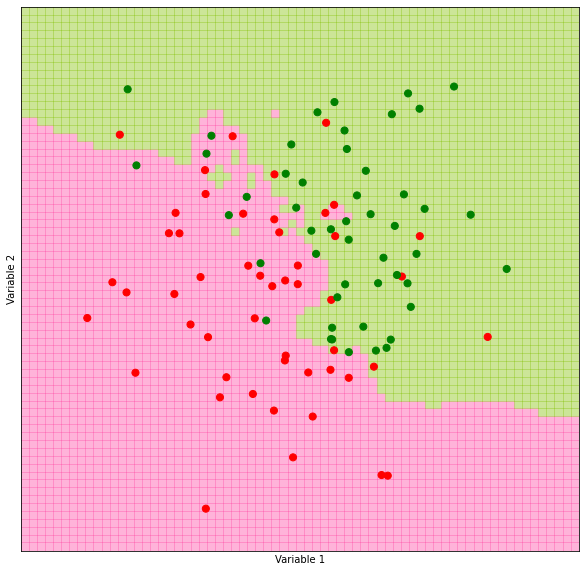

In [83]:
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [0]:
k=50 
filename = "knn_synth_50.pdf"
limits = (-3,4,-3,4)
h=0.1

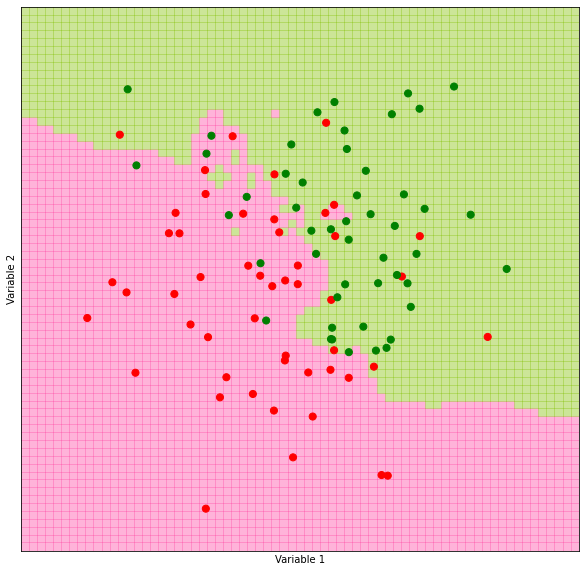

In [85]:
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [0]:
# Testing the home-made knn classifier on iris dataset
from sklearn import datasets
iris = datasets.load_iris()

In [0]:
predictors = iris.data[:, 0:2]
outcomes = iris.target

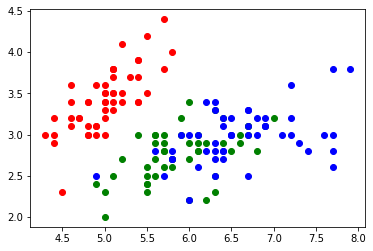

In [94]:
plt.plot(predictors[outcomes==0][:,0], predictors[outcomes==0][:,1], "ro")
plt.plot(predictors[outcomes==1][:,0], predictors[outcomes==1][:,1], "go")
plt.plot(predictors[outcomes==2][:,0], predictors[outcomes==2][:,1], "bo")
plt.savefig("iris.pdf")

In [0]:
k=5
filename = "iris_grid.pdf"
limits = (4,8,1.5,4.5)
h=0.1

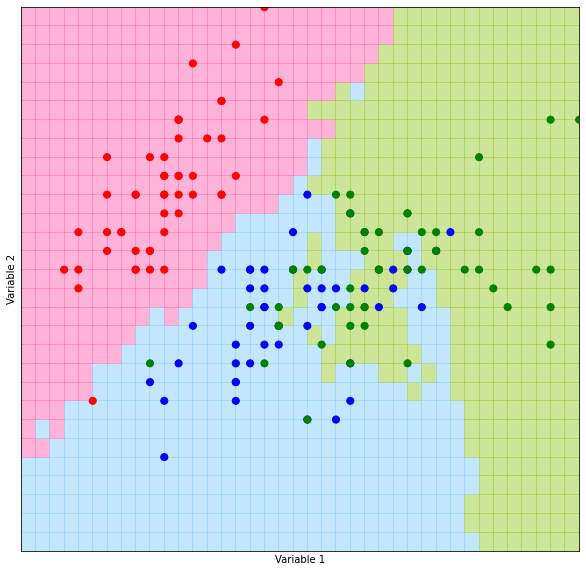

In [113]:
(xx, yy, prediction_grid) = make_prediction_grid(predictors, outcomes, limits, h, k)
plot_prediction_grid(xx, yy, prediction_grid, filename)

In [0]:
# Testing the Scikit learn knn classifier on iris dataset
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors) 


In [102]:
sk_predictions.shape

(150,)

In [0]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

In [109]:
# Comparing the home-made knn classifier with the scikit learn knn classifier
np.mean(sk_predictions == my_predictions)*100

96.0

In [110]:
# Comparing the scikit learn knn classifier with the ground truth
np.mean(sk_predictions == outcomes)*100

83.33333333333334

In [111]:
# Comparing the home-made knn classifier with the ground truth
np.mean(my_predictions == outcomes)*100

84.66666666666667